<a href="https://colab.research.google.com/github/HemanthBodduboinagithub/CNN--project/blob/main/Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kaggle

OSError: ignored

In [ ]:
!mkdir -p /root/.kaggle

In [ ]:
!mv kaggle.json /root/.kaggle/

In [ ]:
import kaggle

In [ ]:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

100% 814M/814M [00:09<00:00, 126MB/s]
100% 814M/814M [00:09<00:00, 94.8MB/s]


In [ ]:
!unzip dogs-vs-cats-redux-kernels-edition.zip

Archive:  dogs-vs-cats-redux-kernels-edition.zip
  inflating: sample_submission.csv   
  inflating: test.zip                
  inflating: train.zip               


In [ ]:
!rm sample_submission.csv test.zip

In [ ]:
!unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [ ]:
import os

In [ ]:
# To see what are the contents inside the folder
len(os.listdir("train"))

25000

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

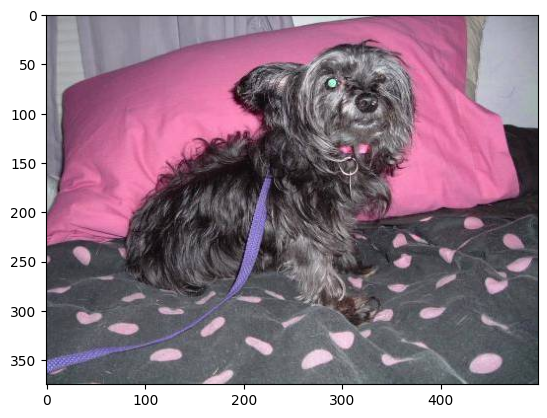

In [ ]:
test_dog_image = cv2.imread("train/dog.0.jpg")
test_dog_image = cv2.cvtColor(test_dog_image,cv2.COLOR_BGR2RGB)
plt.imshow(test_dog_image)

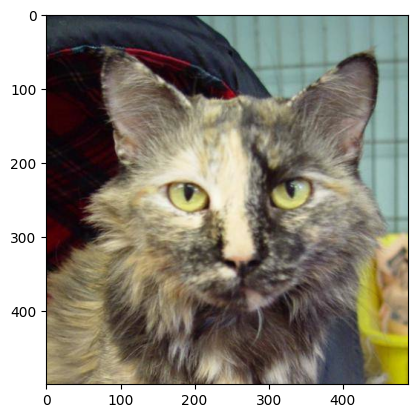

In [ ]:
test_cat_image = cv2.imread("train/cat.10.jpg")
test_cat_image = cv2.cvtColor(test_cat_image,cv2.COLOR_BGR2RGB)
plt.imshow(test_cat_image)

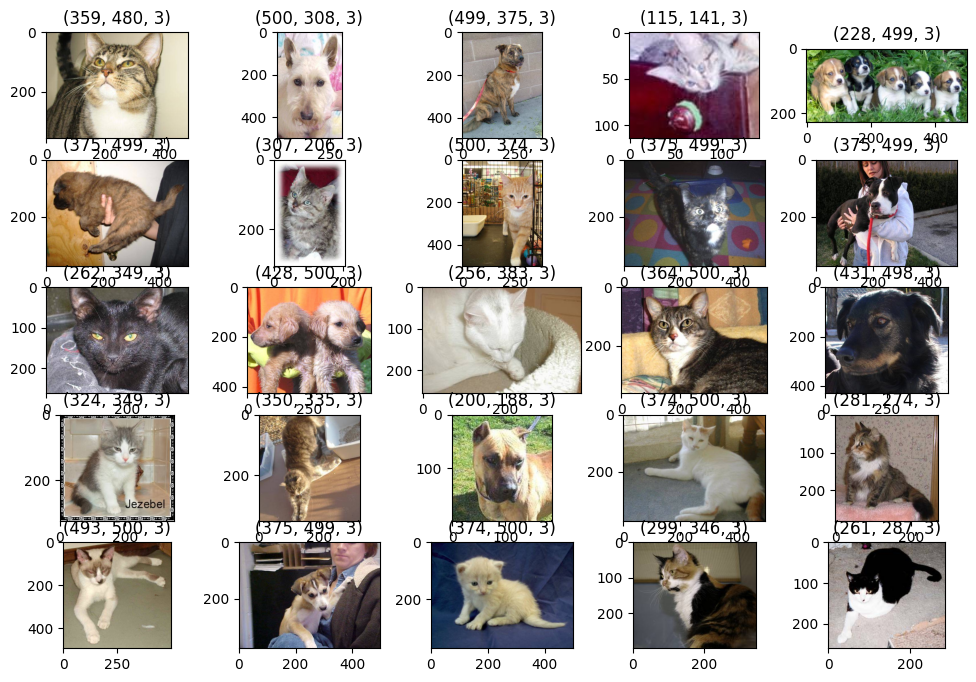

In [ ]:
# perform 5x5 GRID
plt.figure(figsize=(12,8))
random = np.random.choice(os.listdir("train"),25)
for i in range(25):
  plt.subplot(5, 5, i+1)
  image = cv2.cvtColor(cv2.imread("train/"+random[i]), cv2.COLOR_BGR2RGB)
  plt.imshow(image)
  plt.title(image.shape)


In [ ]:
os.listdir("train")[:10]

['cat.3503.jpg',
 'dog.9280.jpg',
 'dog.11626.jpg',
 'dog.7039.jpg',
 'dog.10158.jpg',
 'dog.416.jpg',
 'cat.1429.jpg',
 'dog.3123.jpg',
 'cat.6856.jpg',
 'dog.9845.jpg']

In [ ]:
iamgeName = "dog.10001.jpg"
testimage = cv2.imread("train/" + iamgeName)
print(testimage.shape)
print(testimage.shape[0])
print(testimage.shape[1])

(151, 109, 3)
151
109


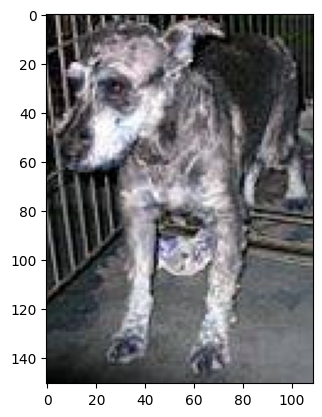

In [ ]:
plt.imshow(testimage)

In [ ]:
plt.figure(figsize=(6,6))

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

In [ ]:
iamgeName.split(".")[0]

'dog'

In [ ]:
# creating empty dataframe
data = pd.DataFrame(columns=['imageName','height','width','category'])
#empty lists
imageName = []
height = []
width = []
category = []
# Iterate overall the 25k images
for _image in os.listdir("train"):
  # reading the iamge using cv2
  image = cv2.imread("train/" + _image)
  imageName.append(_image)
  height.append(image.shape[0])
  width.append(image.shape[1])
  category.append(_image.split(".")[0])

In [ ]:
data["imageName"] = imageName
data["height"] = height
data["width"] = width
data["category"] = category

In [ ]:
data.head()

,imageName,height,width,category
0,cat.3503.jpg,179,240,cat
1,dog.9280.jpg,331,299,dog
2,dog.11626.jpg,399,305,dog
3,dog.7039.jpg,228,379,dog
4,dog.10158.jpg,338,480,dog


In [ ]:
data.category.value_counts()

cat    12500
dog    12500
Name: category, dtype: int64

In [ ]:
data.describe()

,height,width
count,25000.000000,25000.00000
mean,360.478080,404.09904
std,97.019959,109.03793
min,32.000000,42.00000
25%,301.000000,323.00000
50%,374.000000,447.00000
75%,421.000000,499.00000
max,768.000000,1050.00000


In [ ]:
data.height.mean(), data.height.median()

(360.47808, 374.0)

In [ ]:
data.width.mean(), data.width.median()

(404.09904, 447.0)

In [ ]:
testimage.shape

(151, 109, 3)

In [ ]:
testimage1 = cv2.resize(testimage, (100,100))

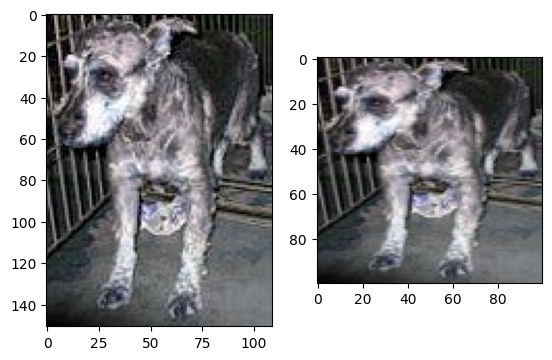

In [ ]:
plt.subplot(1,2,1)
plt.imshow(testimage)
plt.subplot(1,2,2)
plt.imshow(testimage1)

In [ ]:
# empty list we will append all images
imageList = []
labelLst = []